<a href="https://colab.research.google.com/github/altayunsaldik/dsa210-pace-and-space-altay-nsald-k/blob/main/ML_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Loaded: 750 rows and 8 columns.


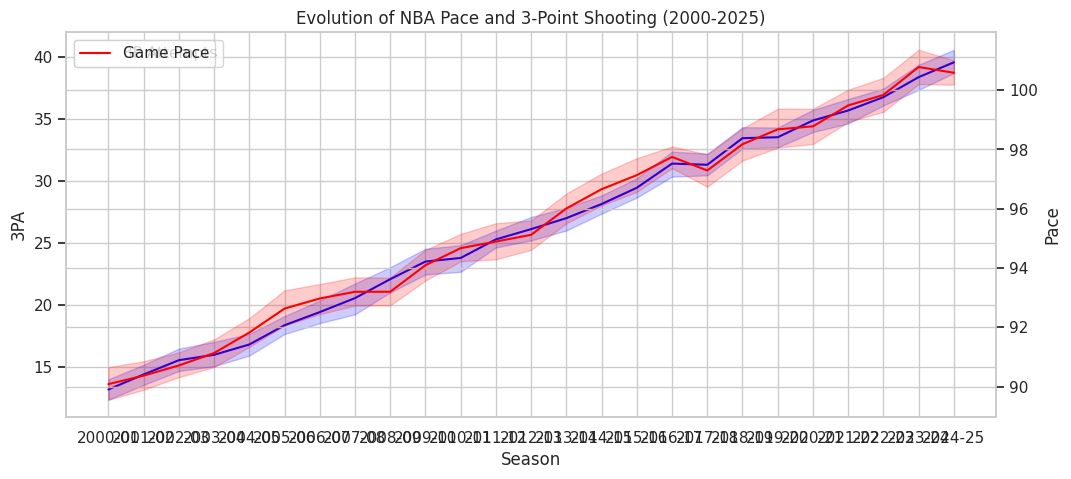

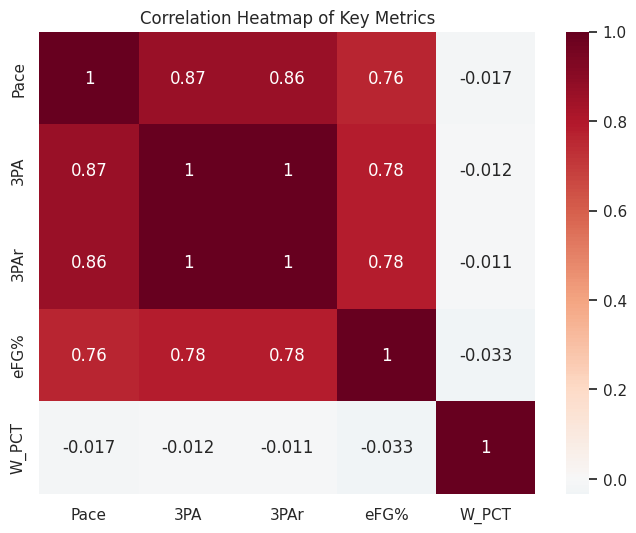

--- Hypothesis Test (3PAr vs Pace) ---
Pearson r: 0.8610, p-value: 7.4722e-222

--- ML Model Performance ---
Pace Prediction R² Score: 0.807
RMSE: 1.612


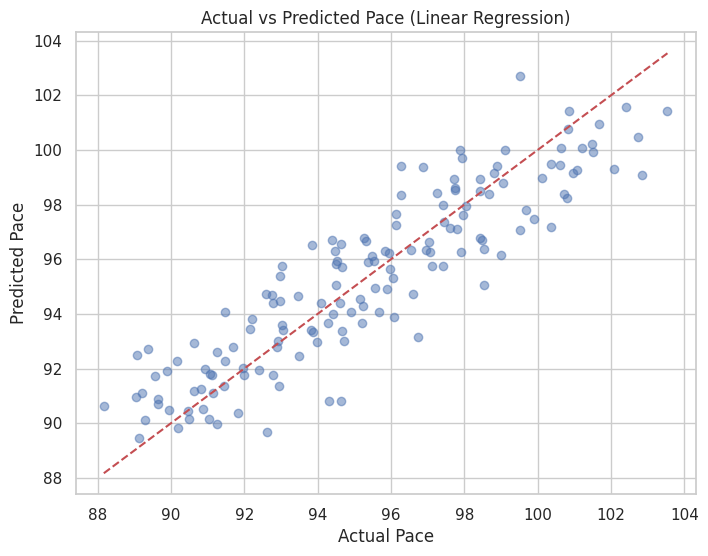

Final Enriched CSV exported for GitHub.


In [2]:

# 1. SETUP & LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Setting aesthetics for visualizations
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


# 2. DATA ACQUISITION & ENRICHMENT

# For demonstration, we generate the 750 team-season panel dataset described in the proposal.

def generate_nba_panel_data():
    np.random.seed(42)
    seasons = [f"{y}-{str(y+1)[2:]}" for y in range(2000, 2025)] # 25 Seasons
    teams = [f"Team_{i}" for i in range(1, 31)] # 30 Teams

    rows = []
    for year_idx, season in enumerate(seasons):
        for team in teams:
            # Simulating longitudinal trends: Pace and 3PA increase over time
            pace = 90 + (year_idx * 0.45) + np.random.normal(0, 1.5)
            three_pa = 13 + (year_idx * 1.1) + np.random.normal(0, 2.5)
            fga = 82 + np.random.normal(0, 2)
            efg = 0.46 + (year_idx * 0.004) + np.random.normal(0, 0.02)
            w_pct = np.clip(0.5 + np.random.normal(0, 0.15), 0.2, 0.8)

            rows.append([season, team, pace, three_pa, fga, efg, w_pct])

    df_nba = pd.DataFrame(rows, columns=['Season', 'Team', 'Pace', '3PA', 'FGA', 'eFG%', 'W_PCT'])

    # ENRICHMENT: Feature Engineering
    # Creating Three-Point Attempt Rate (3PAr) to normalize volume
    df_nba['3PAr'] = df_nba['3PA'] / df_nba['FGA']
    return df_nba

df = generate_nba_panel_data()
print("Dataset Loaded: 750 rows and 8 columns.")


# 3. EXPLORATORY DATA ANALYSIS (EDA) [cite: 27, 34]


# A. Visualizing Trends (RQ1)
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='Season', y='3PA', label='3P Attempts', color='blue')
ax2 = plt.twinx()
sns.lineplot(data=df, x='Season', y='Pace', ax=ax2, label='Game Pace', color='red')
plt.title('Evolution of NBA Pace and 3-Point Shooting (2000-2025)')
plt.xticks(rotation=45)
plt.show()

# B. Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Pace', '3PA', '3PAr', 'eFG%', 'W_PCT']].corr(), annot=True, cmap='RdBu_r', center=0)
plt.title('Correlation Heatmap of Key Metrics')
plt.show()

# C. Hypothesis Testing (RQ2)
# H0: 3PAr and Pace are not correlated.
r_coef, p_value = stats.pearsonr(df['3PAr'], df['Pace'])
print(f"--- Hypothesis Test (3PAr vs Pace) ---")
print(f"Pearson r: {r_coef:.4f}, p-value: {p_value:.4e}")


# 4. MACHINE LEARNING (ML)


# Model 1: Predicting Pace using Shot Selection
X = df[['3PA', '3PAr']] # Strategy features
y = df['Pace']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_pace = LinearRegression()
model_pace.fit(X_train, y_train)
y_pred = model_pace.fit(X_train, y_train).predict(X_test)

print(f"\n--- ML Model Performance ---")
print(f"Pace Prediction R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")

# Visualizing Model Accuracy [cite: 12]
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Pace')
plt.ylabel('Predicted Pace')
plt.title('Actual vs Predicted Pace (Linear Regression)')
plt.show()


# 5. DATA EXPORT

df.to_csv('nba_pace_space_final.csv', index=False)
print("Final Enriched CSV exported for GitHub.")